In [1]:
#Import library yang dibutuhkan dalam sistem
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
import librosa

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import zipfile,os, shutil
from distutils.dir_util import copy_tree

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
base_dir = "/content/drive/My Drive/Proyek_Akhir/Dataset/"
train_dir = os.path.join(base_dir, 'd_train')
validation_dir = os.path.join(base_dir, 'd_val')

In [4]:
# membuat direktori ruangan rapi pada direktori data training
train_watchingtv_dir     = os.path.join(train_dir, 'WatchingTV')
train_listenmusic_dir    = os.path.join(train_dir, 'ListenMusic')
train_crying_dir         = os.path.join(train_dir, 'Crying')
train_washinghand_dir    = os.path.join(train_dir, 'WashingHand')
train_washingclothes_dir = os.path.join(train_dir, 'WashingClothes')
train_cooking_dir        = os.path.join(train_dir, 'Cooking')
train_eating_dir         = os.path.join(train_dir, 'Eating')
train_noactivity_dir     = os.path.join(train_dir, 'NoActivity')

# membuat direktori ruangan rapi pada direktori data training
validation_watchingtv_dir     = os.path.join(validation_dir, 'WatchingTV')
validation_listenmusic_dir    = os.path.join(validation_dir, 'ListenMusic')
validation_crying_dir         = os.path.join(validation_dir, 'Crying')
validation_washinghand_dir    = os.path.join(validation_dir, 'WashingHand')
validation_washingclothes_dir = os.path.join(validation_dir, 'WashingClothes')
validation_cooking_dir        = os.path.join(validation_dir, 'Cooking')
validation_eating_dir         = os.path.join(validation_dir, 'Eating')
validation_noactivity_dir     = os.path.join(validation_dir, 'NoActivity')



In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    horizontal_flip=False,
    vertical_flip=False,
    shear_range=0.1,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    horizontal_flip=False,
    vertical_flip=False,
    shear_range=0.1,
    fill_mode='nearest')

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical')


Found 8779 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(256, (1,1), activation='relu'))
model.add(Conv2D(256, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(256, (2,2),activation='relu'))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(Activation('softmax'))

In [8]:

# compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
#Display model architecture summary
model.summary()

#calculate pre-training accuracy
score = model.evaluate(validation_generator, verbose=0)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       16640     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 256)       1048832   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0

In [ ]:
# program untuk training model
from keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs =50
num_batch_size = 10
checkpointer = ModelCheckpoint(filepath='saved_models/audiolearn_8classFix.h5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(
    train_generator,
    steps_per_epoch=num_batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[checkpointer],
    validation_steps=num_batch_size,
    verbose=1)
duration = datetime.now() - start
print("Training complete in time: ", duration)

Epoch 1/35
32/32 [==============================] - 1710s 54s/step - loss: 2.8208 - accuracy: 0.1334 - val_loss: 1.9964 - val_accuracy: 0.1328

Epoch 00001: val_loss improved from inf to 1.99642, saving model to saved_models/audiolearn_8classFix.h5
Epoch 2/35
32/32 [==============================] - 1069s 33s/step - loss: 1.9327 - accuracy: 0.2149 - val_loss: 1.7045 - val_accuracy: 0.3418

Epoch 00002: val_loss improved from 1.99642 to 1.70455, saving model to saved_models/audiolearn_8classFix.h5
Epoch 3/35
32/32 [==============================] - 857s 26s/step - loss: 1.5973 - accuracy: 0.3954 - val_loss: 1.5368 - val_accuracy: 0.4336

Epoch 00003: val_loss improved from 1.70455 to 1.53682, saving model to saved_models/audiolearn_8classFix.h5
Epoch 4/35
32/32 [==============================] - 788s 24s/step - loss: 1.3239 - accuracy: 0.4523 - val_loss: 1.2884 - val_accuracy: 0.4600

Epoch 00004: val_loss improved from 1.53682 to 1.28838, saving model to saved_models/audiolearn_8classF

In [10]:
#evaluating the model on the trainig and testing set
score = model.evaluate(train_generator, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(validation_generator, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9014694094657898
Testing Accuracy:  0.8475000262260437


In [ ]:
model.save('/content/drive/My Drive/Proyek_Akhir/mymodel_new.h5')

In [9]:
model = tf.keras.models.load_model('/content/drive/My Drive/Proyek_Akhir/mymodel_new1.h5')

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

dir_saved = "/content/drive/My Drive/Proyek_Akhir"

def NormalizeData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))
def extract_features(filename):
  data,sr = librosa.load(filename, sr=None, mono=True, offset=0.0, duration=None)
  print(len(data), sr)
  Norm_Audio = NormalizeData(data)
  mel_spectrogram = librosa.feature.melspectrogram(Norm_Audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
  print(mel_spectrogram.shape)
  log_melspectrogram = librosa.power_to_db(mel_spectrogram)
  print(log_melspectrogram.shape)
  librosa.display.specshow(log_melspectrogram, sr=sr, x_axis="time", y_axis="mel")
  plt.figure(1)
  #plt.plot(Norm_Audio)
  plt.show()

def extract_features1(filename):
  data,sr = librosa.load(filename, sr=None, mono=True, offset=0.0, duration=None)
  print(len(data), sr)
  # energy = np.max(data.astype(float)**2)
  # print("ENERGI SIGNAL : ", energy)
  mel_spectrogram = librosa.feature.melspectrogram(data, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
  print(mel_spectrogram.shape)
  log_melspectrogram = librosa.power_to_db(mel_spectrogram)
  # print("energymin : ", np.min(log_melspectrogram))
  # print("energymax : ", np.max(log_melspectrogram))
  # print("energiRatarata : ", np.average(log_melspectrogram))
  print(log_melspectrogram.shape)
  Norm_melspectrogram = NormalizeData(log_melspectrogram)
  print(Norm_melspectrogram.shape)
  # print("energymin : ", np.min(Norm_melspectrogram))
  # print("energymax : ", np.max(Norm_melspectrogram))
  # print("energiRatarata : ", np.average(Norm_melspectrogram))
  test = np.zeros((128,79))
  tick = 0
  tick1 = 0
  while True:
    if (tick1 >= len(Norm_melspectrogram[0])):        
      tick1 = 0
      tick += 1
      if(tick >= len(Norm_melspectrogram)):
        break
        #print(tick,tick1)
    test[tick][tick1] = Norm_melspectrogram[tick][tick1]
    tick1 += 1
  print("Test : ", test.shape)
  librosa.display.specshow(test, sr=sr, x_axis="time", y_axis="mel")
  #plt.figure(1)
  plt.savefig(dir_saved+'/InputPlot.png')
  # plt.show()

  



In [29]:
label =["Cooking       ", "Crying        ", "Eating        ", "ListenMusic   ", "NoActivity", "WashingClothes", "WashingHand   ", "WatchingTV    "]

def print_prediction(filename):
  extract_features1(filename)
  images = image.load_img(dir_saved+'/InputPlot.png',target_size=(250,250))
  x = image.img_to_array(images)
  x = np.expand_dims(x, axis=0)
  x = x/255.0
  print(x.shape)

  predicted_vector = np.argmax(model.predict(x), axis=1)
  print("predic vec ",predicted_vector[0])
  predicted_class  = label[(predicted_vector[0])]

  if(predicted_vector[0] == 6):
    plus = 1
  else:
    plus = 0

  print('The predicted class is :', predicted_class, '\n')

  predicted_proba_vector = model.predict(x) 
  predicted_proba = predicted_proba_vector[0]
  for i in range(len(predicted_proba)):
    print(label[i], " : ", format(predicted_proba[i], '.12f'))
    #print(label[i], " : ", format(predicted_proba[i]*100, '.f'))
  
  return plus

40000 8000
(128, 79)
(128, 79)
(128, 79)
Test :  (128, 79)
(1, 250, 250, 3)
predic vec  6
The predicted class is : WashingHand    

Cooking         :  0.152636066079
Crying          :  0.209529176354
Eating          :  0.092008076608
ListenMusic     :  0.083984702826
NoActivity  :  0.037833951414
WashingClothes  :  0.043253235519
WashingHand     :  0.226539477706
WatchingTV      :  0.154215320945
Hasil Count nilai : 0
40000 8000
(128, 79)
(128, 79)
(128, 79)
Test :  (128, 79)
(1, 250, 250, 3)
predic vec  2
The predicted class is : Eating         

Cooking         :  0.011112732813
Crying          :  0.004559630062
Eating          :  0.977939188480
ListenMusic     :  0.000315839803
NoActivity  :  0.000050034963
WashingClothes  :  0.000181671363
WashingHand     :  0.004197586328
WatchingTV      :  0.001643377705
Hasil Count nilai : 0
40000 8000
(128, 79)
(128, 79)
(128, 79)
Test :  (128, 79)
(1, 250, 250, 3)
predic vec  1
The predicted class is : Crying         

Cooking         :  0.032

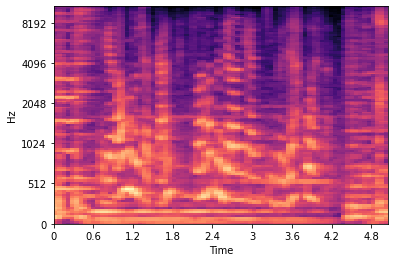

In [18]:
count = 1
batas = 20
hasil =0

while count <= batas:
  point = print_prediction("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioWatchingTV1/audioWatchingTV_"+str(count)+".wav")
  hasil += point
  print("Hasil Count nilai :", hasil)
  count += 1

In [ ]:
count = 0
batas = 9
hasil =0

while count <= batas:
  point = print_prediction("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioNoActivity/audioNoActivity_"+str(count)+".wav")
  hasil += point
  print(hasil)
  count += 1

40000 8000
(128, 79)
(128, 79)
(128, 79)
Test :  (128, 79)
(1, 250, 250, 3)
predic vec  6
The predicted class is : WashingHand    

Cooking         :  0.159254834056
Crying          :  0.011214148253
Eating          :  0.031936477870
ListenMusic     :  0.001480153878
NoActivity  :  0.000521651818
WashingClothes  :  0.010189169087
WashingHand     :  0.544498264790
WatchingTV      :  0.240905329585


1

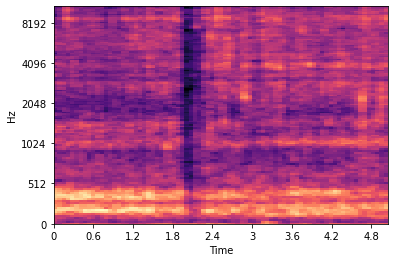

In [32]:
print_prediction("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioWashingHand_27.wav")

15008 8000
(128, 30)
(128, 30)
(128, 30)
Test :  (128, 79)
(1, 250, 250, 3)
The predicted class is : Eating         

Cooking         :  0.022863082588
Crying          :  0.031596716493
Eating          :  0.923849821091
ListenMusic     :  0.001804472529
NoActivity  :  0.000458289083
WashingClothes  :  0.000923752435
WashingHand     :  0.012244928628
WatchingTV      :  0.006258966401


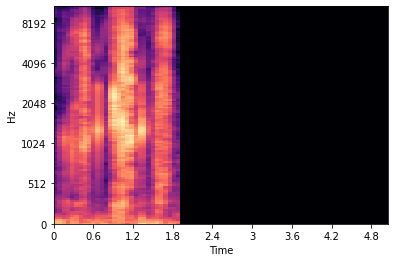

In [ ]:
print_prediction("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioEating_15.wav")

40000 8000
(128, 79)
(128, 79)
(128, 79)
Test :  (128, 79)
(1, 250, 250, 3)
The predicted class is : ListenMusic    

Cooking         :  0.000000000000
Crying          :  0.000000014945
Eating          :  0.000000000000
ListenMusic     :  1.000000000000
NoActivity  :  0.000000000000
WashingClothes  :  0.000000000021
WashingHand     :  0.000000000000
WatchingTV      :  0.000000000000


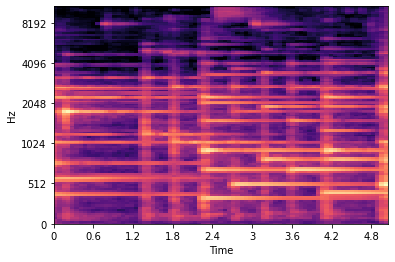

In [ ]:
print_prediction("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioListenMusic_765.wav")

40000 8000
(128, 79)
(128, 79)
(128, 79)
Test :  (128, 79)
(1, 250, 250, 3)
The predicted class is : WatchingTV     

Cooking         :  0.009634069167
Crying          :  0.000119361932
Eating          :  0.000202833631
ListenMusic     :  0.000027877328
NoActivity  :  0.000000556912
WashingClothes  :  0.002854484366
WashingHand     :  0.009614079259
WatchingTV      :  0.977546811104


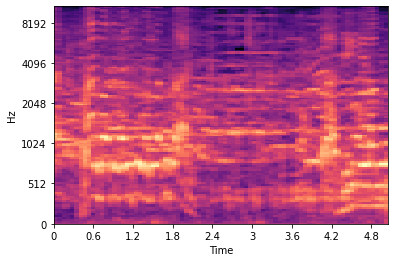

In [ ]:
print_prediction("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioWatchingTV_851.wav")

40000 8000


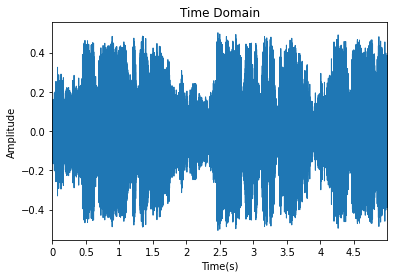

In [ ]:
import librosa 
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

data,sr = librosa.load("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioWatchingTV_850.wav", sr=None, mono=True, offset=0.0, duration=None)
print(len(data), sr)
window = np.hanning(len(data))
windowing = data * window
librosa.display.waveplot(y=data, sr=sr)
plt.title("Time Domain")    
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

array([-2.14308666e+02-0.j        ,  1.07843891e+02+0.45592812j,
       -1.76090758e-01-1.83274936j, ..., -6.52973213e-01-1.87947044j,
       -1.76090758e-01+1.83274936j,  1.07843891e+02-0.45592812j])

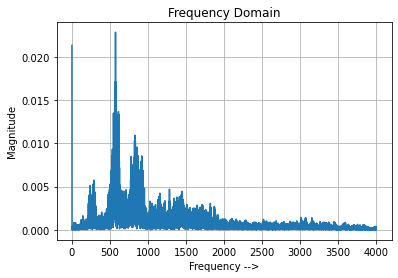

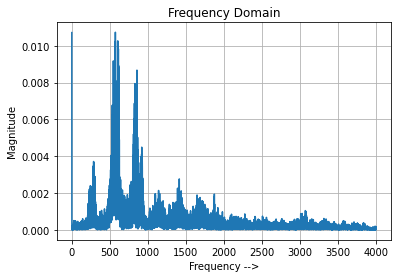

In [ ]:
import matplotlib.pyplot as plt
import scipy
import librosa.display

# VISUALISASI AUDIO KE Fast Fourier Transformation  
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.title("Frequency Domain")
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return yf
fft_plot(data, sr)
fft_plot(windowing, sr)

(128, 79)
(128, 79)
(128, 79)


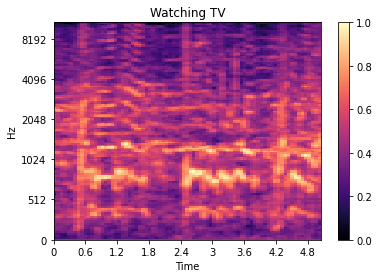

In [ ]:
  mel_spectrogram = librosa.feature.melspectrogram(data, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
  print(mel_spectrogram.shape)
  log_melspectrogram = librosa.power_to_db(mel_spectrogram)
  print(log_melspectrogram.shape)
  Norm_melspectrogram = NormalizeData(log_melspectrogram)
  print(Norm_melspectrogram.shape)
  librosa.display.specshow(Norm_melspectrogram, sr=sr, x_axis="time", y_axis="mel")
  plt.title("Watching TV")
  plt.colorbar()
  plt.show()

In [ ]:
# cek rata-rata nilai RMS (Root Mean Square) Audio
count = 0
batas = 1
dataarray =[]
while count < batas:
  data, sr = librosa.load("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioCooking/audioCooking_"+str(count)+".wav", sr=None, mono=True, offset=0.0, duration=None)
  # rms_result = rms(data)
  rmss = np.max(data)
  #print(rmss)
  dataarray.append(rmss)
  rmse = librosa.feature.rms(data, frame_length=frame_length, hop_length=hop_length, center=True)
  #print("RMS : ", np.sum(rmse))
  #print("\n")
  count += 1

print(np.average(dataarray))
print(dataarray)


In [ ]:
import math
# cek rata-rata nilai RMS (Root Mean Square) Audio
count = 0
batas = 200
dataarray =[]
while count < batas:
  data, sr = librosa.load("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioWashingHand/audioWashingHand_"+str(count)+".wav", sr=None, mono=True, offset=0.0, duration=None)
  # rms_result = rms(data)
  rms_result = math.sqrt(np.mean(data*data))
  print("RMS RESULT : ", rms_result*1000)
  energi = np.sum(data.astype(float)**2)
  energi = 1.0/(2*(data.size)+1)*np.sum(data.astype(float)**2)/sr
  #print(energi)
  dataarray.append(energi)
  count += 1

print(np.mean(dataarray))
print(dataarray)

RMS RESULT :  5.904581784223341
RMS RESULT :  9.151847913766728
RMS RESULT :  10.497535718072902
RMS RESULT :  10.478958807547318
RMS RESULT :  9.178513593893058
RMS RESULT :  10.105271660677538
RMS RESULT :  10.08611151008102
RMS RESULT :  9.607621968653323
RMS RESULT :  9.212562213273195
RMS RESULT :  9.821442809465676
RMS RESULT :  9.289544483989733
RMS RESULT :  8.842903946024565
RMS RESULT :  7.366729589424835
RMS RESULT :  6.847052712365776
RMS RESULT :  6.960058380685658
RMS RESULT :  7.34484197934257
RMS RESULT :  7.439552155775967
RMS RESULT :  7.22162267758833
RMS RESULT :  7.560976093724847
RMS RESULT :  6.619215659963277
RMS RESULT :  7.099576165624682
RMS RESULT :  8.073471741875265
RMS RESULT :  8.001028107598499
RMS RESULT :  7.660915823827288
RMS RESULT :  7.7217220871291845
RMS RESULT :  7.487200305271315
RMS RESULT :  8.283239826482225
RMS RESULT :  7.1125841225637565
RMS RESULT :  6.182644040958195
RMS RESULT :  7.3796716195185414
RMS RESULT :  7.2246325318427385
RMS

In [ ]:
# cek rata-rata nilai RMS (Root Mean Square) Audio
count = 0
batas = 200
dataarray =[]
while count < batas:
  data, sr = librosa.load("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioCrying/audioCrying_"+str(count)+".wav", sr=None, mono=True, offset=0.0, duration=None)
  # rms_result = rms(data)
  energi = np.sum(data.astype(float)**2)
  energi = 1.0/(2*(data.size)+1)*np.sum(data.astype(float)**2)/sr
  #print(energi)
  dataarray.append(energi)
  count += 1

print(np.average(dataarray))
print(dataarray)

4.926006754604427e-07
[1.7354569064332268e-06, 1.7171426287970585e-06, 4.4111486536473816e-06, 1.1897434128257772e-06, 1.044143448428183e-06, 1.5665931233969426e-06, 4.31280390038095e-06, 1.3004893789130402e-06, 1.1330744941838305e-06, 3.4742597419580285e-06, 1.982525367100271e-06, 1.8944033237601368e-06, 1.564216282172781e-06, 4.312734991998159e-06, 1.1616646381207694e-06, 8.63886419368155e-07, 6.981030453157111e-07, 1.9164617919429425e-07, 5.4825718850277355e-08, 0.0, 1.6779659266793784e-07, 1.5465783863369433e-07, 4.3906350247886723e-07, 7.46158351755822e-09, 5.6350322982196445e-08, 2.3466580296823162e-07, 7.054498841515119e-07, 3.0147902699227743e-07, 5.364483040628782e-07, 2.424730992103832e-07, 1.351551276425866e-07, 1.1464843872441312e-09, 5.469846647429323e-10, 1.4076169633515444e-08, 2.2183678633375572e-08, 0.0, 5.4649428947857585e-06, 2.5335892680361644e-09, 4.808684230016647e-06, 2.2736583848910076e-05, 2.9421700948897724e-07, 5.720437021315081e-07, 1.2718908130120078e-06, 2

In [ ]:
# cek rata-rata nilai RMS (Root Mean Square) Audio
count = 0
batas = 100
dataarray =[]
while count < batas:
  data, sr = librosa.load("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioNoActivity/audioNoActivity_"+str(count)+".wav", sr=None, mono=True, offset=0.0, duration=None)
  # rms_result = rms(data)
  energi = np.sum(data.astype(float)**2)
  energi = 1.0/(2*(data.size)+1)*np.sum(data.astype(float)**2)/sr
  #print(energi)
  dataarray.append(energi)
  count += 1

print(np.average(dataarray))
print(dataarray)

1.2137681622019981e-09
[1.2590499306948146e-09, 2.745411465141058e-09, 1.1825135910448426e-09, 1.6510046164197176e-09, 1.1925292764339484e-09, 1.1641443296158874e-09, 1.1911104835254877e-09, 1.1882182616796508e-09, 1.1884355184216546e-09, 1.1884592176474037e-09, 1.176229486486621e-09, 1.1765347008169551e-09, 1.204042795108608e-09, 1.1881363512460031e-09, 1.1835179495875847e-09, 1.1836812309493664e-09, 1.1725132589167298e-09, 1.18332160032129e-09, 1.1902696828274604e-09, 1.193559336975688e-09, 1.186388563655546e-09, 1.2025329481848608e-09, 1.1937632108523402e-09, 1.1755491413856593e-09, 1.1910590975352635e-09, 1.1901509068506936e-09, 1.1910174361955797e-09, 1.1966526358550308e-09, 1.1994482967639986e-09, 1.2049476406225298e-09, 1.1918760994191168e-09, 1.1839987200305593e-09, 1.1869480722543015e-09, 1.1758442013345778e-09, 1.1888187051228032e-09, 1.1914439743292901e-09, 1.1797436660585999e-09, 1.1835174815674616e-09, 1.1957269853641713e-09, 1.182396789465444e-09, 1.2328163468747755e-09, 

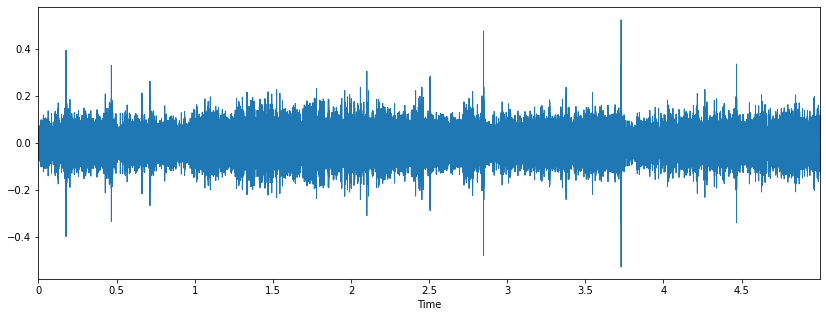

In [ ]:
# Belajar fitur ektraksi

#load audio dengan library Librosa
dataX, sr = librosa.load("/content/drive/My Drive/Proyek_Akhir/TestAudio/audioCooking/audioCooking_20.wav", sr=None, mono=True, offset=0.0, duration=None)
plt.figure (figsize = (14, 5)) 
librosa.display.waveplot (dataX, sr = sr)

In [ ]:
#display Spectrogram 
X = librosa.stft (dataX) 
Xdb = librosa.amplitude_to_db (abs (dataX)) 
print(np.max(Xdb.astype(int)**2))
plt.figure (figsize = (14, 5)) 
#librosa.display.specshow (Xdb, sr = sr, x_axis = 'time', y_axis ='hz') 
# If to pring log frekuensi   
# librosa.display.specshow (Xdb, sr = sr, x_axis =' time ', y_axis =' log ') 
#plt.colorbar ()

7225


<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>